# 前馈神经网络

目录

- 多层感知机
- 多层感知机从零开始实现
- 多层感知机的简洁实现

## 多层感知机

简要介绍一些常见的激活函数

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

ReLU提供了一种非常简单的非线性变换
$$\operatorname{ReLU}(x) = \max(x, 0)$$

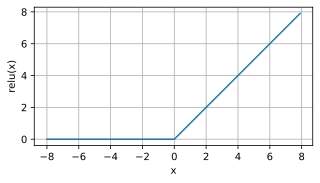

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

`retain_graph=True`: prevent memory deallocation, so parts of the compute graph can be referenced later.

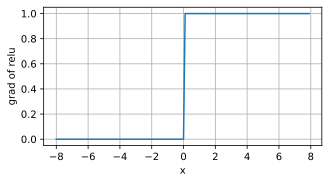

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

对于一个定义域在$\mathbb{R}$中的输入，
*sigmoid函数*将输入变换为区间(0, 1)上的输出
$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}$$

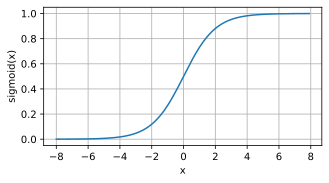

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

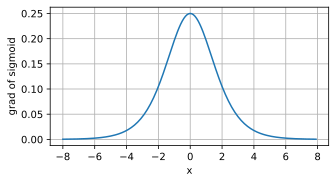

In [5]:
x.grad.data.zero_()  # 清除以前的梯度
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

Tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上
$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}$$

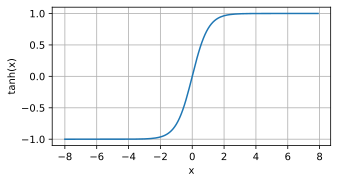

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

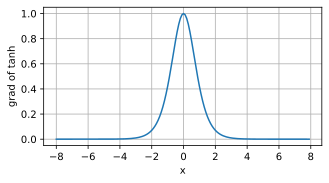

In [7]:
x.grad.data.zero_()  # 清除以前的梯度
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 多层感知机从零开始实现



In [8]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

实现一个具有单隐藏层的多层感知机，
它包含256个隐藏单元

In [9]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

实现ReLU激活函数

In [10]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

实现我们的模型

In [11]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

loss = nn.CrossEntropyLoss(reduction='none')

多层感知机的训练过程与softmax回归的训练过程完全相同

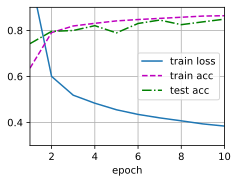

In [12]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

在一些测试数据上应用这个模型

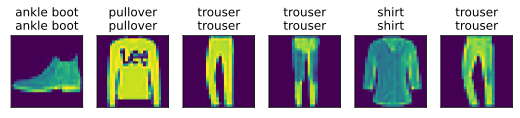

In [13]:
d2l.predict_ch3(net, test_iter)

## 多层感知机的简洁实现

通过高级API更简洁地实现多层感知机

In [14]:
import torch
from torch import nn
from d2l import torch as d2l

隐藏层
包含256个隐藏单元，并使用了ReLU激活函数

In [15]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

训练过程

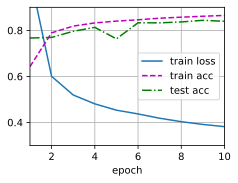

In [16]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)